## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.

In [2]:
df = pd.read_csv('./data/car_data.csv')
print(df.head(), '\n') # head
print(df.shape, '\n') # dimensions (1000 observations, 5 variables)

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0 

(1000, 5) 



2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.

In [3]:
print(df[['User ID','Gender','Age','AnnualSalary','Purchased']].describe()) #all variables have 1000 observations, no nans
# since gender was string categorical, it was not summarized
df['Gender_bool'] = df['Gender'].replace(['Male','Female'],[0,1]) #makes categories boolean
X = df.loc[:,['Age','AnnualSalary']]
y = df['Purchased']

           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000


3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.

In [4]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head(), '\n')
print(X.describe(), '\n')

        Age  AnnualSalary
0  0.377778      0.036364
1  0.488889      0.207273
2  0.688889      0.429091
3  0.488889      0.672727
4  0.155556      0.465455 

               Age  AnnualSalary
count  1000.000000   1000.000000
mean      0.491244      0.419556
std       0.237935      0.250824
min       0.000000      0.000000
25%       0.311111      0.228182
50%       0.488889      0.414545
75%       0.666667      0.545455
max       1.000000      1.000000 



4. Split the sample into a ~80% training dataset and a ~20% testing dataset.

In [5]:
# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.

In [6]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regressor tool

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star) # k=9

[9]


6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?

In [7]:
# though k was optimized with regression, the prediction is a classification problem
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier # Import kNN classifier tool

# Run the model:
model = kNNClassifier(n_neighbors=9) # Create a sk model for k=9
classifier_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = classifier_model.predict(X_test) # Use model to predict the y-values for the test set

# Cross tabulate real vs predicted outcomes
print(pd.crosstab(y_test,y_hat)) # test on side, hat is top

col_0        0   1
Purchased         
0          104  15
1            3  78


In [8]:
type2error = (15/(104+15))*100 # model predicts sale but there is not one
print('Model predicts a sale ' + str(type2error) + '% of the time when one has failed to occur.')
type1error = (3/(104+3))*100 # model fails to predict sale when there is one
print ('Model predicts no sale ' + str(type1error) + '% of the time when one has occured.')
overallaccuracy = ((104+78)/(104+15+3+78))*100 # overall accuracy
print("The model's overall accuracy is " + str(overallaccuracy) + "%.")

Model predicts a sale 12.605042016806722% of the time when one has failed to occur.
Model predicts no sale 2.803738317757009% of the time when one has occured.
The model's overall accuracy is 91.0%.


The overall accuracy of the model is 91%, so I think it provides pretty good predictions.

7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [9]:
# Make matrix X contain gender and set y as purchase
X = df.loc[:,['Age','AnnualSalary','Gender']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

# Run the model:
model = kNNClassifier(n_neighbors=9) # Create a sk model for k=9
classifier_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model on our data
y_hat = classifier_model.predict(X_test.drop('Gender',axis=1)) # Use model to predict the y-values for the test set

y_test_f = y_test[X_test['Gender'] == 'Female']
y_hat_f = y_hat[X_test['Gender'] == 'Female']
print(pd.crosstab(y_test_f,y_hat_f))

y_test_m = y_test[X_test['Gender'] == 'Male']
y_hat_m = y_hat[X_test['Gender'] == 'Male']
print(pd.crosstab(y_test_m,y_hat_m))

col_0       0   1
Purchased        
0          57  10
1           5  33
col_0       0   1
Purchased        
0          45   7
1          15  28


In [10]:
overallfaccuracy = ((57+33)/(57+10+5+33))*100 # overall accuracy
print("Model's overall accuracy for predicting values for females is " + str(overallfaccuracy) + '%.')
overallmaccuracy = ((45+28)/(45+7+15+28))*100 # overall accuracy
print("Model's overall accuracy for predicting values for males is " + str(overallmaccuracy) + '%.')

Model's overall accuracy for predicting values for females is 85.71428571428571%.
Model's overall accuracy for predicting values for males is 76.84210526315789%.


The model makes more accurate predictions for females than males. Models having different accuracies based on demographic variables is problematic because there could be unequal consequences for a group and could lead to injustice.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [93]:
df = pd.read_csv('./data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage']]
print(df.head(), '\n') # head
print(df.shape, '\n') # dimensions (2499 observations, 3 variables)
print(df.describe()) # non nans

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654 

(2499, 3) 

              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


2. Maxmin normalize `year` and `mileage`.

In [94]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
df[['year','mileage']] = df[['year','mileage']].apply(maxmin)
print(df.head(), '\n') # head

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537 



3. Split the sample into ~80% for training and ~20% for evaluation.

In [95]:
X = df.loc[:,['year','mileage']]
y = df['price']

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

AttributeError: module 'seaborn' has no attribute 'move_legend'

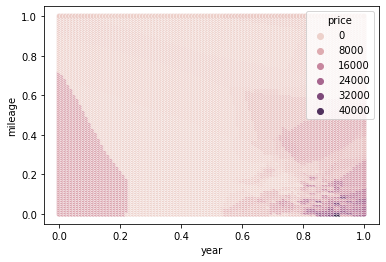

In [96]:
# Fit the model:
k=3
model = kNNRegression(n_neighbors=k) # Create a sk model for k=3
fitted_model = model.fit(X,y) # Train the model on our data

# Plot
N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot
grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values
xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors
x_hat = pd.DataFrame({'year':X,'mileage':Y}) # Create a dataframe of points to plot
y_hat = fitted_model.predict(x_hat) # Fit the model to the points
x_hat['price'] = y_hat # Add new variable to the dataframe
this_plot = sns.scatterplot(data=x_hat,x='year',y='mileage',hue='price') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

In [97]:
def statics(k=3,data=df): # This function replicates our previous work, with k as an input
    y = df['price'] # Create target variable vector
    X = df.loc[:,['year','mileage']] # Create feature matrix
    # Normalize:
    X = X.apply(maxmin)
    model = kNNRegression(n_neighbors=k) # Create a sk model for k=3
    fitted_model = model.fit(X,y) # Train the model on our data
    N_x = 100 # Coarseness of x variable
    N_y = 100 # Coarseness of y variable
    total = N_x*N_y # Total number of points to plot
    grid_x = np.linspace(0,1,N_x) # Create a grid of x values
    grid_y = np.linspace(0,1,N_y) # Create a grid of y values
    xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
    X = xs.reshape(total) # Turns pairs into vectors
    Y = ys.reshape(total) # Turns pairs into vectors
    x_hat = pd.DataFrame({'year':X,'mileage':Y}) # Create a dataframe of points to plot
    y_hat = fitted_model.predict(x_hat) # Fit the model to the points
    x_hat['price'] = y_hat # Add new variable to the dataframe
    this_plot = sns.scatterplot(data=x_hat,x='year',y='mileage',hue='price') # Create seaborn plot
    sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

AttributeError: module 'seaborn' has no attribute 'move_legend'

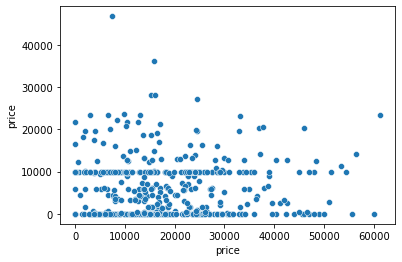

In [98]:
this_plot = sns.scatterplot(x=y_test,y=x_hat['price']) # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

AttributeError: module 'seaborn' has no attribute 'move_legend'

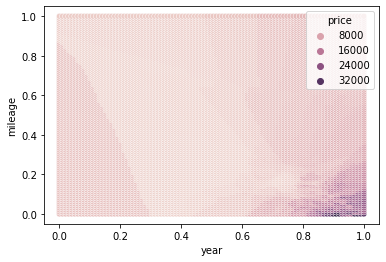

In [100]:
statics(10)

AttributeError: module 'seaborn' has no attribute 'move_legend'

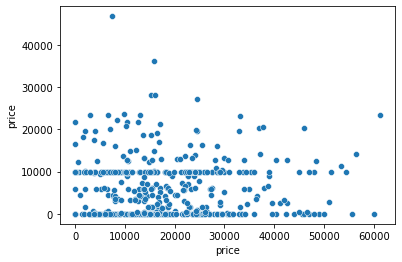

In [84]:
this_plot = sns.scatterplot(x=y_test,y=x_hat['price']) # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

AttributeError: module 'seaborn' has no attribute 'move_legend'

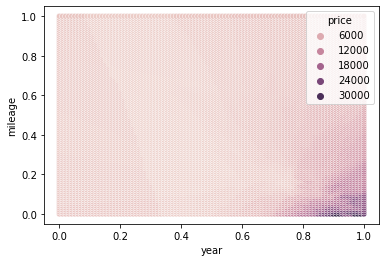

In [85]:
statics(25)

AttributeError: module 'seaborn' has no attribute 'move_legend'

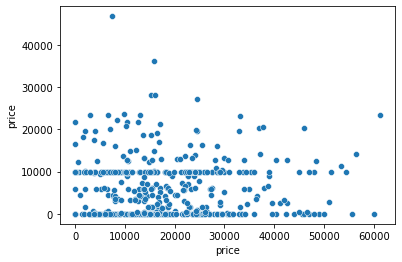

In [86]:
this_plot = sns.scatterplot(x=y_test,y=x_hat['price']) # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

AttributeError: module 'seaborn' has no attribute 'move_legend'

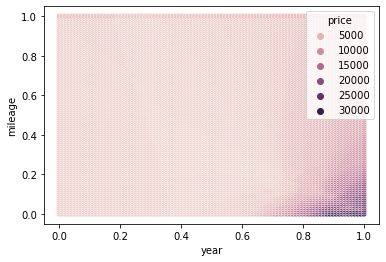

In [87]:
statics(50)

AttributeError: module 'seaborn' has no attribute 'move_legend'

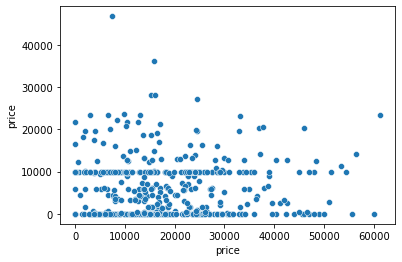

In [88]:
this_plot = sns.scatterplot(x=y_test,y=x_hat['price']) # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

AttributeError: module 'seaborn' has no attribute 'move_legend'

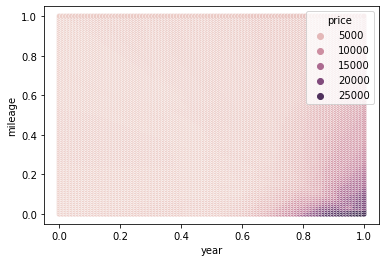

In [89]:
statics(100)

AttributeError: module 'seaborn' has no attribute 'move_legend'

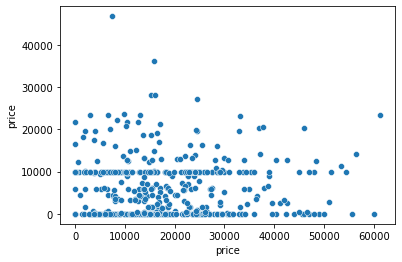

In [90]:
this_plot = sns.scatterplot(x=y_test,y=x_hat['price']) # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

AttributeError: module 'seaborn' has no attribute 'move_legend'

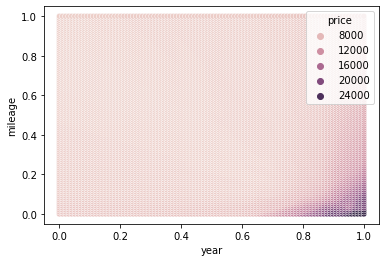

In [91]:
statics(300)

AttributeError: module 'seaborn' has no attribute 'move_legend'

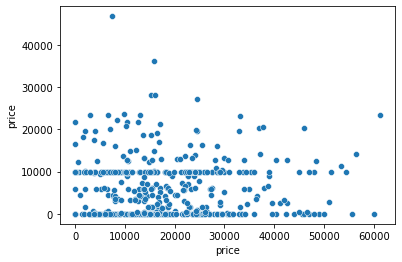

In [92]:
this_plot = sns.scatterplot(x=y_test,y=x_hat['price']) # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

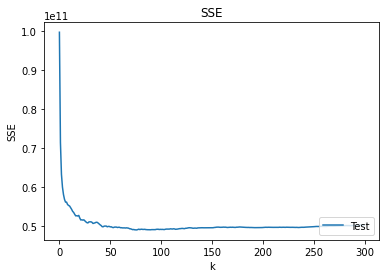

In [62]:
# compute SSE for each k value
k_bar = 300
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

import matplotlib.pyplot as plt

plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

As the numbers of clusters (k) increases, the fuzzier/more blurred the boundaries of the price levels come. Additionally, as you can see on the plot directly above, as k increases, the error decreases as the clusters approach the number of data points.

For each value of  𝑘 , compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  𝑘 ?

I think I did something wrong (maybe accidently used the global (k=3) variables) with the predicted vs actual graphs because they look the same.

5. Determine the optimal $k$ for these data.

In [64]:
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

[1]


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?

3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [16]:
df = pd.read_csv('./data/airbnb_hw.csv')
print(df.head(), '\n') # head
print(df.shape, '\n') # dimensions (30478 observations, 13 variables)
print(df.dtypes, '\n') # data types

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

After coercion: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 

Total Missings: 
 181 



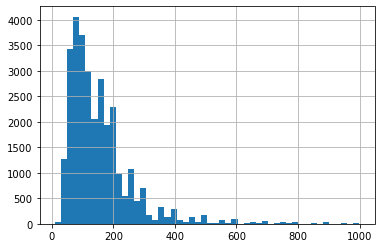

In [17]:
# Price
var = 'Price'
df[var] = pd.to_numeric(df[var], errors='coerce') # fix data type of price
# How to create a missing value dummy:
df[var+'_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null
# After coercion:
print('After coercion: \n', df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df[var+'_nan']),'\n') # How many missing values are there?

Total Missings: 
 85 

[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.] 

1.0     20344
2.0      6610
3.0      2071
4.0       783
5.0       284
6.0       177
7.0        45
8.0        24
10.0       16
9.0        15
16.0       13
11.0        5
12.0        4
0.0         2
Name: Beds, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 



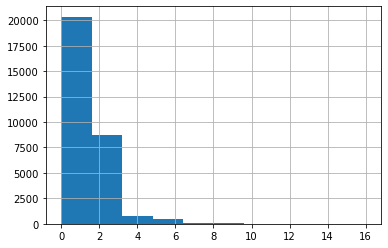

In [18]:
# Beds
var = 'Beds'
df[var+'_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df[var+'_nan']),'\n') # How many missing values are there?
print(df[var].unique(),'\n') # 0 rooms seems odd, but maybe it is a studio???
print(df[var].value_counts(), '\n')
print(df[var].hist(), '\n')

Total Missings: 
 0 

[  0   1  39   4   9  80  95  23  14 120  81  17  32  52   3 171  16  19
   2  28  62   6   5  12  40  47  13  35  34  68  42   7  41  15  21   8
  10  29 112  25 132  51 156  30  98  24  74  20 188 221  57  11 242  67
 118  60 136 119  79 106  43  91 105  96 141 146  63  58  18 150  38  55
  89  46  77  48  36  69  26  73  53 165  92  87 108 109  50 127  88  83
 184 179  22  31  82  27 123 247 190 257 217  85 103 157 102  56 125 115
  49  97  54  65  90  44  33 100  37 107 114 116  61 104  71  75 145  84
  93 110 172 148 131 154  86  64  76 129  45 180 140  78 200 175 189 170
 187  72 137  99 101  59  94 124 223 173 151 142 163 121 256 248 149 128
 133  66 117 176 111  70 183 218 192 206 161 216 191 213 178 122 153 177
 167 113 126 135 181 138 143 195 182 198 211 166 139 134 144 174 159 155
 203 201 164 212 236 235 130] 

0      7814
1      3572
2      2457
3      1764
4      1382
       ... 
164       1
211       1
195       1
163       1
247       1
Name: Numbe

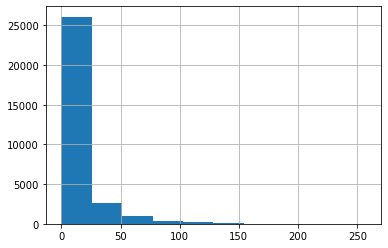

In [19]:
# Number of Reviews, and Review Scores Rating
var = 'Number Of Reviews'
df[var+'_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df[var+'_nan']),'\n') # How many missing values are there?
print(df[var].unique(),'\n') # 0 rooms seems odd, but maybe it is a studio???
print(df[var].value_counts(), '\n')
print(df[var].hist(), '\n')

Total Missings: 
 8323 

[ nan  96. 100.  94.  90.  98.  93.  91.  97.  95.  99.  85.  86.  80.
  88.  92.  89.  82.  87.  81.  76.  78.  83.  66.  84.  72.  79.  60.
  40.  62.  74.  77.  50.  71.  75.  73.  69.  65.  68.  70.  67.  64.
  20.  57.  58.  43.  63.  55.  47.  53.  49.  30.] 

100.0    5594
90.0     1729
93.0     1614
80.0     1423
95.0     1295
96.0     1188
97.0     1033
94.0      943
92.0      875
98.0      843
91.0      812
87.0      714
88.0      614
89.0      561
85.0      365
86.0      348
99.0      318
84.0      289
83.0      267
60.0      244
82.0      136
70.0      132
73.0       89
78.0       84
77.0       80
76.0       75
81.0       66
75.0       60
40.0       47
79.0       46
67.0       42
20.0       39
72.0       32
74.0       26
71.0       22
65.0       21
50.0       19
68.0       19
69.0       11
53.0        8
62.0        5
63.0        5
64.0        4
47.0        3
55.0        3
66.0        3
43.0        2
30.0        2
57.0        2
58.0        2
49.0    

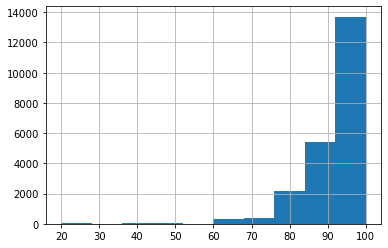

In [20]:
# Review Scores Rating
var = 'Review Scores Rating'
df[var+'_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df[var+'_nan']),'\n') # How many missing values are there?
print(df[var].unique(),'\n') # 0 rooms seems odd, but maybe it is a studio???
print(df[var].value_counts(), '\n')
print(df[var].hist(), '\n')

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [21]:
# Remove nans
df = df.dropna()

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Normalize the data:
X = df.loc[ : , ['Price','Beds','Number Of Reviews','Review Scores Rating']] # Select data to cluster
X = X.apply(maxmin) # Normalize the data


# # Remove nans
# subdf = df[['Price','Beds','Number Of Reviews','Review Scores Rating']]
# subdf.dropna()

# def maxmin(x): # Max-min scaler function
#     x = (x-min(x))/(max(x)-min(x))
#     return x

# # Normalize the data:
# X = subdf.loc[ : , ['Price','Beds','Number Of Reviews','Review Scores Rating']] # Select data to cluster
# X = X.apply(maxmin) # Normalize the data

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

AttributeError: module 'seaborn' has no attribute 'move_legend'

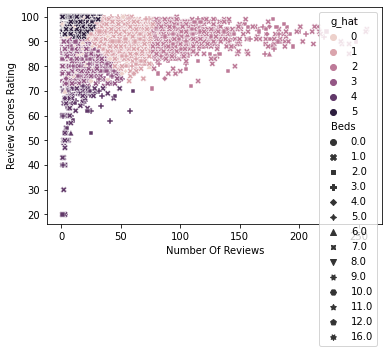

In [22]:
from sklearn.cluster import KMeans # Import kmc

# Create a kmc model: 
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)

X = df.loc[ : , ['Beds','Number Of Reviews','Review Scores Rating']] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Fit the kmc model:
model = model.fit(X)

# Predict values:
df['g_hat'] = model.predict(X)
this_plot = sns.scatterplot(data=df,x='Number Of Reviews',y='Review Scores Rating',hue ='g_hat', style ='Beds') # Plot the fake data
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

AttributeError: module 'seaborn' has no attribute 'move_legend'

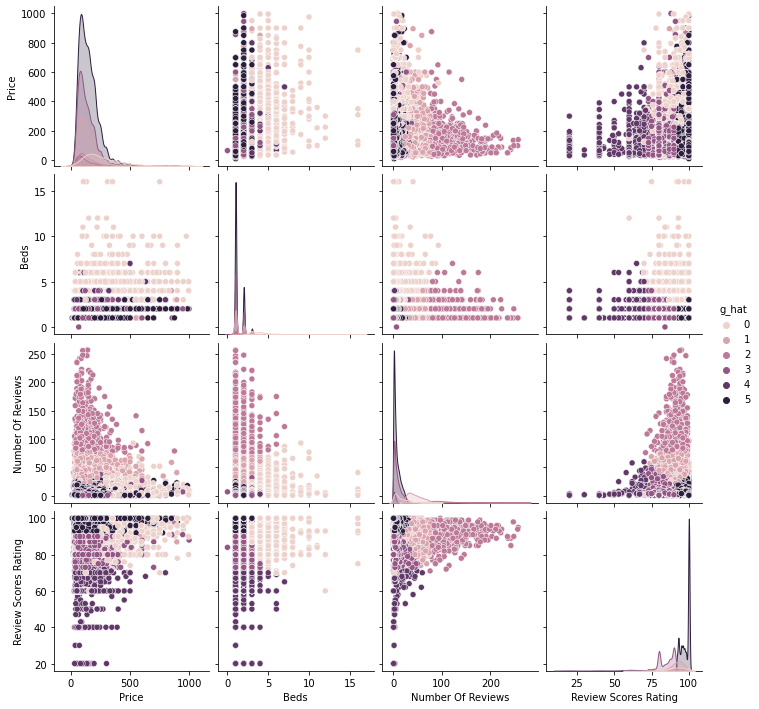

In [23]:
df['g_hat'] = model.predict(X)
subdf = df[['Price','Beds','Number Of Reviews','Review Scores Rating','g_hat']] 
this_plot = sns.pairplot(data=subdf,hue='g_hat', kind='scatter') # Plot the fake data
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [27]:
subdf.groupby('g_hat').describe()
# clusters 0 and 5 have the highest average rental prices

Price                                                            \
         count        mean         std   min    25%    50%    75%    max   
g_hat                                                                      
0       1619.0  267.707844  166.441170  27.0  150.0  225.0  350.0  997.0   
1       3005.0  141.282529   82.782055  22.0   88.0  125.0  175.0  895.0   
2        780.0  133.361538   83.542215  27.0   80.0  110.0  169.0  875.0   
3       5506.0  130.258082   77.541504  20.0   75.0  110.0  169.0  999.0   
4        629.0  125.720191   94.260960  25.0   65.0   99.0  150.0  799.0   
5      10420.0  149.004894   90.371312  10.0   85.0  130.0  190.0  985.0   

          Beds            ... Number Of Reviews        Review Scores Rating  \
         count      mean  ...               75%    max                count   
g_hat                     ...                                                 
0       1619.0  4.117974  ...              21.0   93.0               1619.0   
1       3005.0  1.419967  ...              54.0   77.0               3005.0   
2        780.0  1.560256  ...             120.0  257.0                780.0   
3       5506.0  1.347076  ...              12.0   51.0               5506.0   
4        629.0  1.637520  ...               4.0   60.0                629.0   
5      10420.0  1.286660  ...              10.0   33.0              10420.0   

                                                               
            mean        std   min    25%    50%    75%    max  
g_hat                                                          
0      91.549722   5.897389  60.0  88.00   92.0   96.0  100.0  
1      92.229617   3.933856  74.0  90.00   93.0   95.0  100.0  
2      91.902564   4.448333  71.0  89.75   93.0   95.0  100.0  
3      85.039048   4.864459  72.0  80.00   87.0   90.0   91.0  
4      58.944356  12.990384  20.0  60.00   60.0   69.0   72.0  
5      97.645298   2.801988  92.0  95.00  100.0  100.0  100.0  

[6 rows x 32 columns]

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

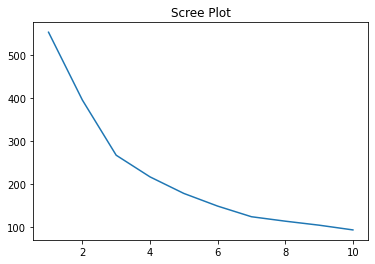

In [28]:
# Create a scree plot:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    
scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

AttributeError: module 'seaborn' has no attribute 'move_legend'

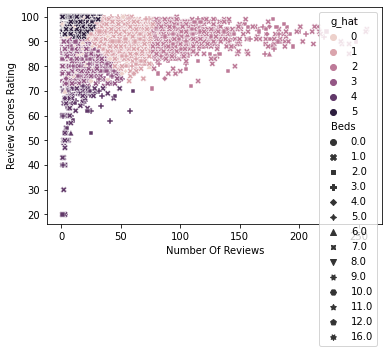

In [30]:
# k will be 7 according to scree plot

# Create a kmc model: 
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)

X = df.loc[ : , ['Beds','Number Of Reviews','Review Scores Rating']] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Fit the kmc model:
model = model.fit(X)

# Predict values:
df['g_hat'] = model.predict(X)
this_plot = sns.scatterplot(data=df,x='Number Of Reviews',y='Review Scores Rating',hue ='g_hat', style ='Beds') # Plot the fake data
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

AttributeError: module 'seaborn' has no attribute 'move_legend'

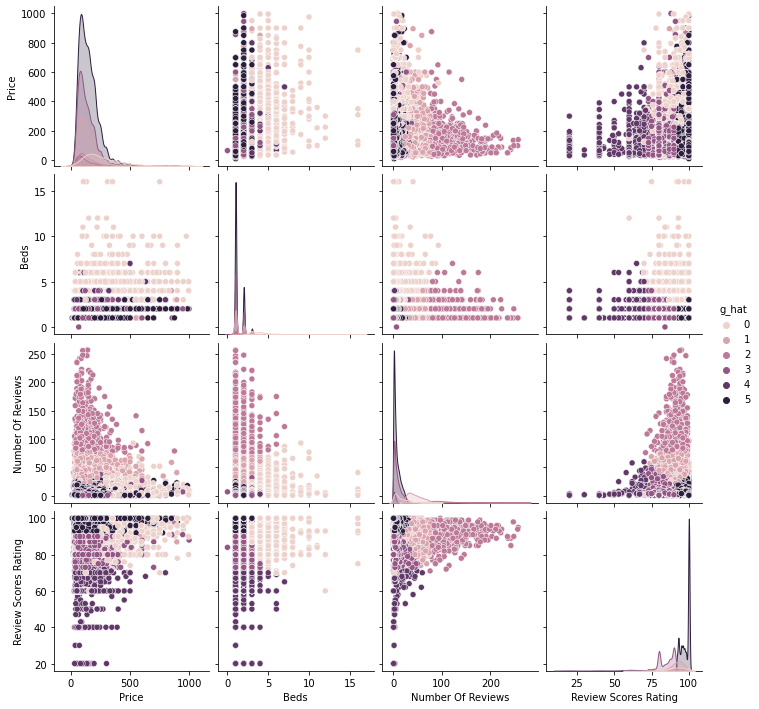

In [31]:
df['g_hat'] = model.predict(X)
subdf = df[['Price','Beds','Number Of Reviews','Review Scores Rating','g_hat']] 
this_plot = sns.pairplot(data=subdf,hue='g_hat', kind='scatter') # Plot the fake data
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

In [32]:
subdf.groupby('g_hat').describe()
# clusters 0 and 5 still have the highest average rental prices

Price                                                            \
         count        mean         std   min    25%    50%    75%    max   
g_hat                                                                      
0       1619.0  267.707844  166.441170  27.0  150.0  225.0  350.0  997.0   
1       3005.0  141.282529   82.782055  22.0   88.0  125.0  175.0  895.0   
2        780.0  133.361538   83.542215  27.0   80.0  110.0  169.0  875.0   
3       5506.0  130.258082   77.541504  20.0   75.0  110.0  169.0  999.0   
4        629.0  125.720191   94.260960  25.0   65.0   99.0  150.0  799.0   
5      10420.0  149.004894   90.371312  10.0   85.0  130.0  190.0  985.0   

          Beds            ... Number Of Reviews        Review Scores Rating  \
         count      mean  ...               75%    max                count   
g_hat                     ...                                                 
0       1619.0  4.117974  ...              21.0   93.0               1619.0   
1       3005.0  1.419967  ...              54.0   77.0               3005.0   
2        780.0  1.560256  ...             120.0  257.0                780.0   
3       5506.0  1.347076  ...              12.0   51.0               5506.0   
4        629.0  1.637520  ...               4.0   60.0                629.0   
5      10420.0  1.286660  ...              10.0   33.0              10420.0   

                                                               
            mean        std   min    25%    50%    75%    max  
g_hat                                                          
0      91.549722   5.897389  60.0  88.00   92.0   96.0  100.0  
1      92.229617   3.933856  74.0  90.00   93.0   95.0  100.0  
2      91.902564   4.448333  71.0  89.75   93.0   95.0  100.0  
3      85.039048   4.864459  72.0  80.00   87.0   90.0   91.0  
4      58.944356  12.990384  20.0  60.00   60.0   69.0   72.0  
5      97.645298   2.801988  92.0  95.00  100.0  100.0  100.0  

[6 rows x 32 columns]

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?